# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

from wordcloud import WordCloud
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 30
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [31]:

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


In [32]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/British Airways Internship/data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Clean and Prepare Data

In [33]:
stop_words = stopwords.words("english")

def clean_text(text):
    text = re.sub(r"✅ Trip Verified", "", text)
    text = re.sub(r"Not Verified", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text



In [34]:
df["reviews"] = df["reviews"].apply(clean_text)
df.head()

,reviews
0,everything ok connecting flight london take ru...
1,initial flight cancelled 8 hours prior flight ...
2,never fly british airways flight july 15 2023 ...
3,check security clearance quick lhr t5 wife use...
4,british airways confirmed worst airline uk las...


##Analyze the Data

In [35]:
#Perform sentiment analysis

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df["sentiment"] = df["reviews"].apply(get_sentiment)
df.head()

,reviews,sentiment
0,everything ok connecting flight london take ru...,-0.145551
1,initial flight cancelled 8 hours prior flight ...,-0.055952
2,never fly british airways flight july 15 2023 ...,-0.333333
3,check security clearance quick lhr t5 wife use...,0.277706
4,british airways confirmed worst airline uk las...,-0.150000


In [36]:
#Calculate average sentiment scores for all reviews
average_sentiment = df["sentiment"].mean()
print("Average sentiment score:", average_sentiment)

Average sentiment score: 0.08725957853414638


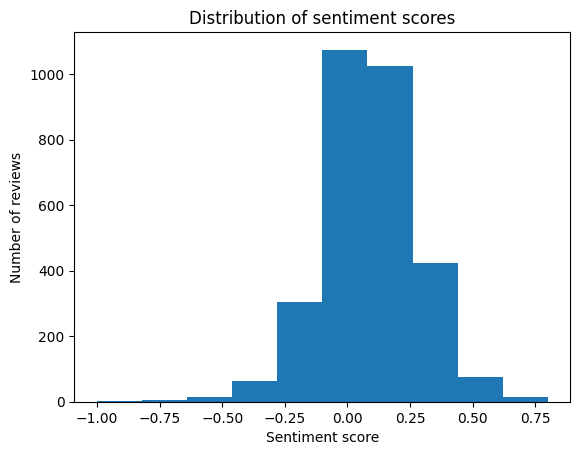

In [37]:
#Histogram of the sentiment scores

plt.hist(df["sentiment"])
plt.xlabel("Sentiment score")
plt.ylabel("Number of reviews")
plt.title("Distribution of sentiment scores")
plt.show()

## Visualize the results

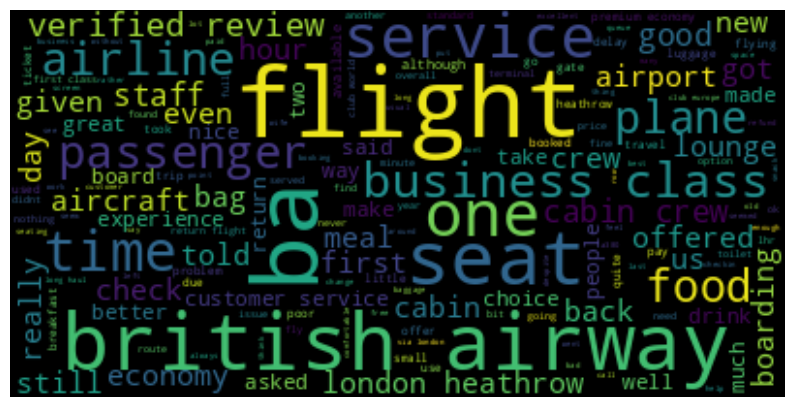

In [38]:
wordcloud = WordCloud(max_font_size=50).generate(df["reviews"].str.cat(sep=" "))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Interpretation of results

An average sentiment score of 0.08 indicates that the overall sentiment of the data is slightly positive.

However, the distribution of the sentiment scores shows that there were a significant number of reviews with a negative sentiment score. This suggests that while many customers had a positive experience, there were also a number of customers who had a negative experience.

